<a href="https://colab.research.google.com/github/Fawzan98/pistachio-classification/blob/main/Pistachio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install patool
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 4.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=313a6881182637526d28bf249068413241edadddf42d5a84295db2d62d7a9098
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!pip freeze > requirements.txt
!cat requirements.txt

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2022.5.18.1
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.30
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
di

## Download and extracting data from the compressed files

In [3]:
# download dataset

import os
import wget

data_url = "https://github.com/Fawzan98/pistachio-classification/raw/main/pistachio_imgdataset.rar"
wget.download(data_url)

'pistachio_imgdataset.rar'

In [4]:
os.listdir()

['.config',
 'pistachio_imgdataset.rar',
 'requirements.txt',
 'drive',
 'sample_data']

In [5]:
#extract dataset

import patoolib
#os.mkdir("pistachio_data")
patoolib.extract_archive("pistachio_imgdataset.rar", outdir="/content")

              

patool: Extracting pistachio_imgdataset.rar ...
patool: running /usr/bin/unrar x -- /content/pistachio_imgdataset.rar
patool:     with cwd='/content'
patool: ... pistachio_imgdataset.rar extracted to `/content'.


'/content'

In [6]:
os.listdir()


['.config',
 'pistachio_imgdataset.rar',
 'requirements.txt',
 'drive',
 'Pistachio_Image_Dataset',
 'sample_data']

In [7]:
#os.chdir("Pistachio_Image_Dataset")
os.listdir()

['.config',
 'pistachio_imgdataset.rar',
 'requirements.txt',
 'drive',
 'Pistachio_Image_Dataset',
 'sample_data']

## Split data into 80% training and 20% testing

In [8]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import splitfolders
splitfolders.ratio("/content/Pistachio_Image_Dataset", output="output", seed=239, ratio=(.8, .2))

Copying files: 2148 files [00:00, 7423.86 files/s]


In [10]:
os.listdir
train_path = "./output/train"
test_path = "./output/val"

In [11]:
#check dimension of kirmizi and siirt pistachio
import matplotlib.image as mpimg
img1 = mpimg.imread('./output/train/Kirmizi_Pistachio/kirmizi (16).jpg')
img2 = mpimg.imread('./output/train/Siirt_Pistachio/siirt (36).jpg')

img1.shape, img2.shape

((600, 600, 3), (600, 600, 3))

In [12]:
img_size = 512
batch = 32
labels = []
for i in os.listdir(train_path):
    labels+=[i]
labels

['Siirt_Pistachio', 'Kirmizi_Pistachio']

## Display 3 example image of Kirmizi and Siirt Pistachio

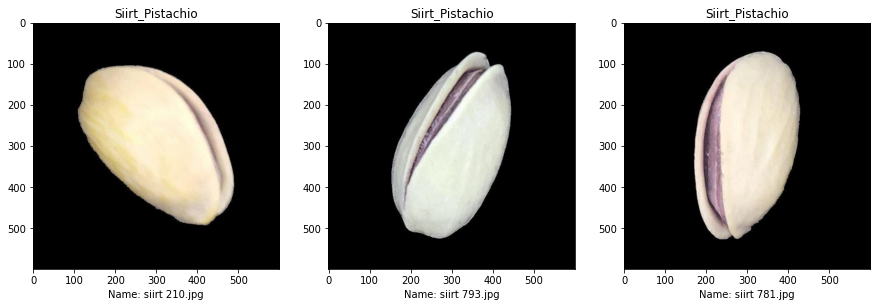

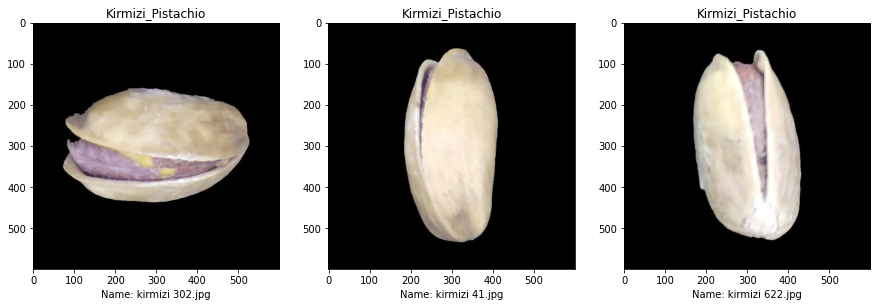

In [13]:
data_dir="/content/Pistachio_Image_Dataset"

import matplotlib.pyplot as plt
import random

def load_random_imgs_from_folder(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(3):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    ax.title.set_text(label)
    plt.xlabel(f'Name: {file}')
    plt.imshow(img)
for label in labels:
    load_random_imgs_from_folder(f"{data_dir}/{label}",label)

## Data Augmentation

A form of random data transformation where the model never see twice of exact image, thus generalize better and prevent overfitting. 

In [14]:
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental import preprocessing


train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   rotation_range = 0.4,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                  )


test_datagen= ImageDataGenerator(rescale = 1.0/255.0)

In [15]:
train_generator = train_datagen.flow_from_directory(directory = train_path,
                                                    batch_size = batch,
                                                    class_mode = "categorical",
                                                    target_size = (img_size,img_size)
                                                    )

test_generator = test_datagen.flow_from_directory(directory = test_path,
                                                    batch_size = batch,
                                                    class_mode = "categorical",
                                                    target_size = (img_size,img_size)
                                                    )

Found 1717 images belonging to 2 classes.
Found 431 images belonging to 2 classes.


##Deep Neural Network Model

Pre-trained VGG16 from tensorflow were imported to build the model. The model's custom layers used 

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


base_model = VGG16(weights='imagenet', include_top=False,
                            input_shape=(img_size, img_size,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)
x = Dense(4096,activation="relu")(x)
x = Dense(4096,activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(2096,activation="relu")(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)


58900480/58889256 [==============================] - 1s 0us/step


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

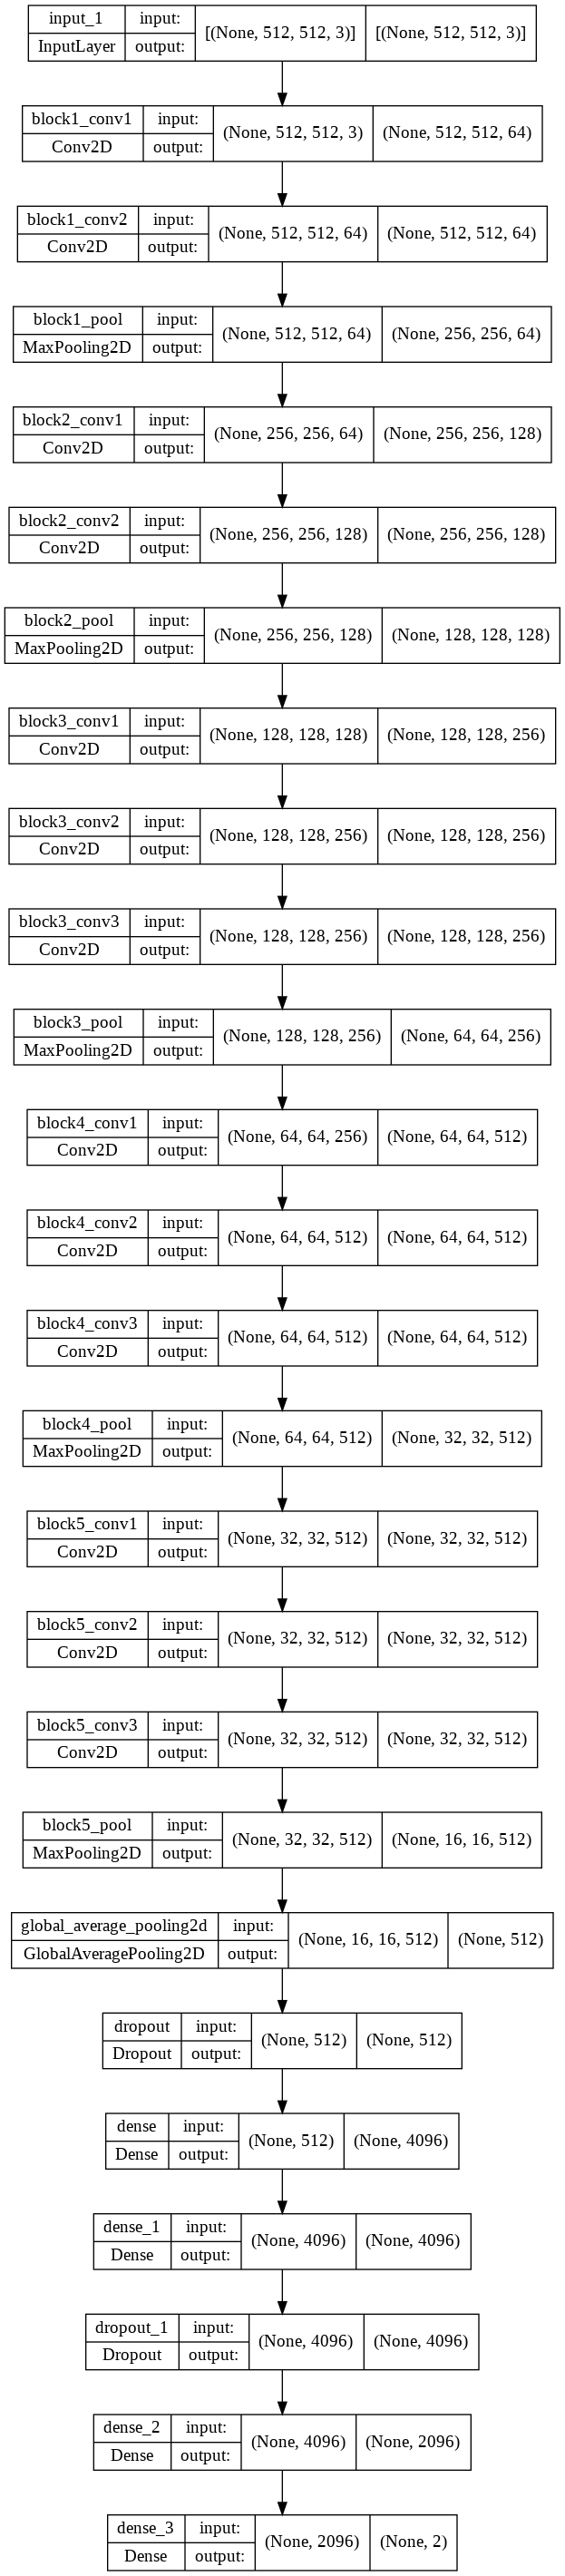

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [19]:
#apply early stoping when the loss value does not improve

callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                ModelCheckpoint('vgg16_1.h5',
                                 save_best_only=True)]



In [20]:
opt = Adam(learning_rate=0.005)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

##Training the model

50 epochs will be used to train the model, if the validation loss does not improve during the training, then the training will automatically stop.

In [21]:
history=model.fit(train_generator,
                  epochs=50,
                  validation_data=test_generator,
                  validation_steps=int(0.1 * len(test_generator)),
                  verbose=1,
                  callbacks=callbacks)

Epoch 1/50
54/54 [==============================] - 140s 2s/step - loss: 11.6253 - accuracy: 0.5539 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 2/50
54/54 [==============================] - 106s 2s/step - loss: 0.6902 - accuracy: 0.5614 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/50
54/54 [==============================] - 104s 2s/step - loss: 0.6877 - accuracy: 0.5737 - val_loss: 0.6912 - val_accuracy: 0.5312
Epoch 4/50
54/54 [==============================] - 105s 2s/step - loss: 0.6843 - accuracy: 0.5737 - val_loss: 0.6298 - val_accuracy: 0.7500
Epoch 5/50
54/54 [==============================] - 106s 2s/step - loss: 0.6844 - accuracy: 0.5708 - val_loss: 0.6488 - val_accuracy: 0.6875
Epoch 6/50
54/54 [==============================] - 104s 2s/step - loss: 0.6783 - accuracy: 0.5795 - val_loss: 0.6626 - val_accuracy: 0.6250
Epoch 7/50
54/54 [==============================] - 105s 2s/step - loss: 0.6852 - accuracy: 0.5737 - val_loss: 0.7231 - val_accuracy: 0.4688
Epoch 8/50
5

In [22]:
from tensorflow.keras.models import load_model
model = load_model('./vgg16_1.h5')

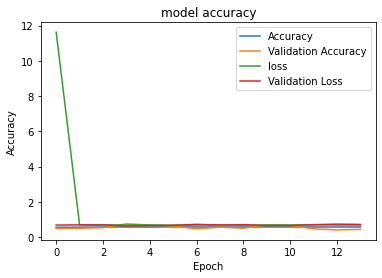

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

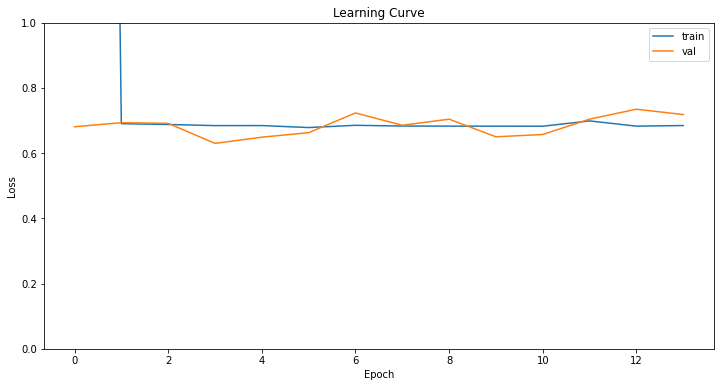

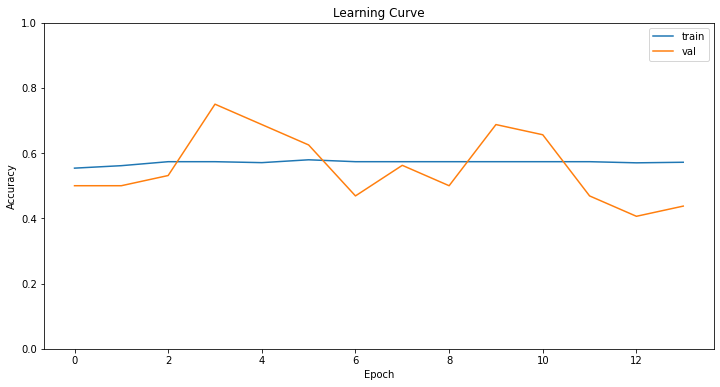

In [24]:
def learning_curve(model_fit, key='accuracy', ylim=(0, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'val'], loc='best')
    plt.show()
learning_curve(history,'loss', ylim=(0,1))
learning_curve(history, 'accuracy', ylim=(0,1))

In [25]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

14/14 [==============================] - 18s 1s/step - loss: 0.6824 - accuracy: 0.5731
Loss: 0.682
Accuracy: 57.309


In [26]:
img = image.load_img("./content/output/val/Siirt_Pistachio/siirt (11).jpg",target_size=(img_size,img_size))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

NameError: ignored

In [ ]:
data_dir="/content/Pistachio_Image_Dataset"

import matplotlib.pyplot as plt
import random

def load_random_imgs_from_folder(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(3):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    ax.title.set_text(label)
    plt.xlabel(f'Name: {file}')
    plt.imshow(img)
for label in labels:
    load_random_imgs_from_folder(f"{data_dir}/{label}",label)